### Imports

In [37]:
import PyPDF2
import wordcloud
import numpy as np
from matplotlib import pyplot as plt

### Stopwords

In [38]:
# Stopwords
with open('stopwords.txt', 'r', encoding='utf-8') as f:
  dados = f.readlines()

for index, palavra in enumerate(dados):
  dados[index] = str(palavra.split()).strip('[]').replace("'", "")

stopwords = set(dados)

# print(stopwords, len(stopwords))

### Extract PDF

In [39]:
# Abre o arquivo e cria o objeto 
pdfFileObj = open('tese.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# Parsing all pages
def get_content(pdf):
    text = ''
    for page in range(0, pdf.numPages):
        pageObj = pdf.getPage(page)
        text += pageObj.extractText()
    return text

# Extrai o texto bruto
raw_text = get_content(pdfReader)

### Cleaning data

In [40]:
# Elimina quebras de linha e tabulações
text = raw_text.replace('\n', '').replace('\r', '').strip()

# Elimina espaços duplos internos
text = " ".join(text.split())

# Remove pontuação
pontuação = '''!()-[]{};:'"\,<>./?@#$%^&*_~ºª'''

def remove_pontuação(text):
    """
    Retorna o texto em caixa baixa SE 'letra' ou 'espaço'.
    """
    rm_pontuação = [i.lower() for i in text if i.isalpha() or i.isspace()]
    return ''.join(rm_pontuação)

clean_text = remove_pontuação(text)  # -> str

# Converte string em lista
words = clean_text.split()

# Elimina 'º' e 'ª'
words = [x for x in words if x not in ['º', 'ª']]

# Elimina palavras com menos de 3 letras
words = [x for x in words if len(x) > 2]

# Filtra as stopwords 
words = [x for x in words if x not in stopwords]

### Calcula frequência + Wordcloud

In [41]:
def calcula_frequencia(texto):
  """Calcula frequência e cria Wordcloud"""
  resultado = {}
  for palavra in texto:
    if palavra not in resultado:
      resultado[palavra] = 0  # cria a chave (entry, key)
    resultado[palavra] += 1
  
  # Wordcloud
  cloud = wordcloud.WordCloud()
  cloud.generate_from_frequencies(resultado)
  
  return cloud.to_array()

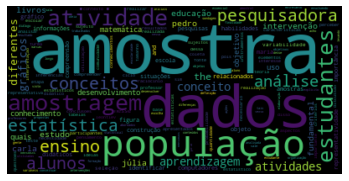

In [42]:
# Cria imagem
myimage = calcula_frequencia(words)
plt.imshow(myimage, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### README.md

# Crash Course on Python<sup>[1](#myfootnote1)</sup> - Projeto Final
---
Optei pelo *jupyter notebook* pela conveniência das anotações. O programa simplesmente abre um arquivo `.pdf`, limpa os dados, calcula a frequência das palavras no texto e imprime uma "word cloud". 

<a name="myfootnote1">1</a>: *O curso faz parte da especialização [Google IT Automation with Python](https://www.coursera.org/professional-certificates/google-it-automation), disponível no **Coursera**.* 

### Dependências
---
```bash
pip install PyPDF2
pip install wordcloud
```

### Inspiração
---
Muitas ideias para o **tratamento do texto** foram retiradas do tutorial [How to Clean Text for Machine Learning with Python](https://machinelearningmastery.com/clean-text-machine-learning-python/), de Jason Brownlee.

### TODO
---
1. [ ] Interface gráfica para abrir o arquivo.
2. [ ] Configurar o *output* da "word cloud".